In [1]:
import requests
# import json
import pandas as pd

In [2]:
url = 'https://ssd-api.jpl.nasa.gov/fireball.api'
# params = {'date-min': '2000-01-01', 
#           'date-max': '2024-01-01'}
response = requests.get(url)
data = response.json()
data_df = pd.DataFrame(data['data'], columns=data['fields'])
data_df['lat'] = pd.to_numeric(data_df['lat'])
data_df['lon'] = pd.to_numeric(data_df['lon'])
data_df_coords = data_df.copy()
data_df_coords['lat'] = ''
data_df_coords['lon'] = ''

In [3]:
for i in range(len(data_df_coords)):
    if data_df_coords['lat-dir'][i] == 'S':
        data_df_coords['lat'][i] = data_df['lat'][i] * -1
    else:
        data_df_coords['lat'][i] = data_df['lat'][i]
    if data_df_coords['lon-dir'][i] == 'W':
        data_df_coords['lon'][i] = data_df['lon'][i] * -1
    else:
        data_df_coords['lon'][i] = data_df['lon'][i]
data_df_coords

,date,energy,impact-e,lat,lat-dir,lon,lon-dir,alt,vel
0,2024-02-26 11:21:01,3.7,0.13,22.9,N,57.1,E,33.1,31.3
1,2024-02-05 00:32:54,4.6,0.15,-13.8,S,123.7,E,23.0,14.4
2,2023-12-30 21:04:34,21.7,0.6,-63.4,S,79.9,E,37.0,28.3
3,2023-11-21 22:17:29,3.8,0.13,-9.4,S,17.4,E,37.0,18.3
4,2023-10-30 07:22:56,2.6,0.092,-42.9,S,-44.7,W,33.8,17.6
...,...,...,...,...,...,...,...,...,...
968,1993-11-29 17:48:41,2.6,0.092,26.5,N,78.3,E,None,None
969,1993-10-31 03:39:27,4.0,0.13,51.3,N,-100.9,W,None,None
970,1991-10-04 09:22:47,55.0,1.4,78.7,N,6.3,E,None,None
971,1990-10-01 03:51:47,250.0,5.2,7.5,N,142.8,E,None,None


In [4]:
data_df_coords.sample(5)

,date,energy,impact-e,lat,lat-dir,lon,lon-dir,alt,vel
672,2005-01-01 03:44:09,45.4,1.2,32.7,N,12.4,E,31.8,None
871,1998-09-04 09:16:11,12.8,0.38,NaN,None,NaN,None,None,None
331,2015-02-17 13:19:50,3.3,0.11,-8.0,S,-11.2,W,39,28.8
658,2005-04-06 01:30:24,2.9,0.1,-42.7,S,154.6,E,70.0,None
686,2004-07-25 05:29:13,19.7,0.55,NaN,None,NaN,None,None,None


In [5]:
# data_df_coords = data_df_coords[['lat', 'lon']]
data_df_coords.rename(columns = {'lon': 'lng'}, inplace=True)
data_df_coords.dropna(inplace=True)
# data_df_coords.to_json('data.json')

In [32]:
data_df_coords['lat'] = pd.to_numeric(data_df_coords['lat'])
data_df_coords['lng'] = pd.to_numeric(data_df_coords['lng'])
data_df_coords['energy'] = pd.to_numeric(data_df_coords['energy'])
data_df_coords.dtypes

date         object
energy      float64
impact-e     object
lat         float64
lat-dir      object
lng         float64
lon-dir      object
alt          object
vel          object
dtype: object

In [7]:
data_df_coords.describe()

,date,energy,impact-e,lat,lat-dir,lng,lon-dir,alt,vel
count,292,292,292,292.0,292,292.0,292,292,292
unique,292,182,106,262.0,2,279.0,2,147,145
top,2024-02-26 11:21:01,2.4,0.13,40.8,N,109.9,E,37.0,16.9
freq,1,6,17,3.0,151,3.0,178,14,6


In [54]:
min = data_df_coords['energy'].min()
max = data_df_coords['energy'].max()
print((float(max)-float(min))/6)
print(max)
print(min)

6249.666666666667
37500.0
2.0


In [35]:
list_ = []
incr = (float(max)-float(min))/6
val = float(min)
for x in range(7):
    list_.append(val)
    val += incr
list_

[2.0,
 6251.666666666667,
 12501.333333333334,
 18751.0,
 25000.666666666668,
 31250.333333333336,
 37500.0]

In [48]:
import numpy as np
37500/5 * (np.log(list_)/np.log(10) )

array([ 2257.72496748, 28469.96860325, 30727.17251462, 32047.68325364,
       32984.63692278, 33711.40990597, 34305.23450796])

In [49]:
import matplotlib.pyplot as plt

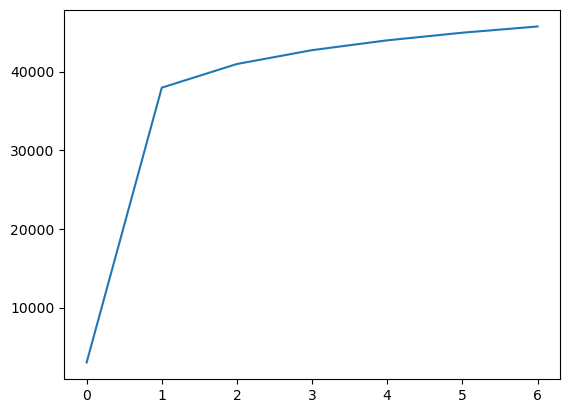

In [53]:
plt.plot((np.log(list_)/np.log(10))*10000)